## Problem Statement

* Predicting whether a driver will leave the company or not based on the features given
* This is the classification problem for churning, we need to track the various metrics like Recall, ROC-AUC curve etc.
* As this industry is very competitive we need to focus more on the trained feature importances.



## Importing relevant libraries


In [136]:
import random

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

## Loading dataset

In [3]:
df=pd.read_csv("ola_driver_scaler.csv")

In [4]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Basic Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [6]:
df.shape

(19104, 14)

In [8]:
df=df.drop(columns='Unnamed: 0')

In [9]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


#### Checking Duplicate rows

In [133]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]

# If duplicate_rows is empty, there are no duplicates; otherwise, it contains the duplicate rows
if duplicate_rows.empty:
    print("No duplicate rows found in the DataFrame.")
else:
    print("Duplicate rows found in the DataFrame:")
    print(duplicate_rows)


No duplicate rows found in the DataFrame.


#### Converting date columns to pandas Datetime

In [11]:
##Converting 'MMM-YY' feature to datetime type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

##Converting 'Dateofjoining' feature to datetime type
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

##Converting 'LastWorkingDate' feature to datetime type
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

#### Checking null values

In [12]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [13]:
unique_counts = df.nunique()
print(unique_counts)

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64


#### Isolating Numerical columns for KNN imputation

In [14]:
numerical_df = df.select_dtypes(include=['number'])

In [15]:
numerical_df

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,2788,30.0,0.0,2,70254,2,2,200420,2


In [17]:
numerical_df.drop(columns='Driver_ID',inplace=True)
columns=numerical_df.columns

#### KNN imputation

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)
imputer.fit(numerical_df)
# transform the dataset
newdf = imputer.transform(numerical_df)

In [19]:
newdf

array([[ 2.80000e+01,  0.00000e+00,  2.00000e+00, ...,  1.00000e+00,
         2.38106e+06,  2.00000e+00],
       [ 2.80000e+01,  0.00000e+00,  2.00000e+00, ...,  1.00000e+00,
        -6.65480e+05,  2.00000e+00],
       [ 2.80000e+01,  0.00000e+00,  2.00000e+00, ...,  1.00000e+00,
         0.00000e+00,  2.00000e+00],
       ...,
       [ 3.00000e+01,  0.00000e+00,  2.00000e+00, ...,  2.00000e+00,
         0.00000e+00,  2.00000e+00],
       [ 3.00000e+01,  0.00000e+00,  2.00000e+00, ...,  2.00000e+00,
         2.00420e+05,  2.00000e+00],
       [ 3.00000e+01,  0.00000e+00,  2.00000e+00, ...,  2.00000e+00,
         4.11480e+05,  2.00000e+00]])

In [20]:
newdf=pd.DataFrame(newdf)

In [21]:
newdf

,0,1,2,3,4,5,6,7
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [22]:
newdf.columns=columns

In [23]:
newdf

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


### Checking if null values have been imputed

In [24]:
newdf.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

#### Getting back the entire dataset after Imputation

In [25]:
remaining_columns=list(set(df.columns).difference(set(columns)))

In [26]:
data=pd.concat([newdf, df[remaining_columns]],axis=1)

In [27]:
data.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,LastWorkingDate,Driver_ID,Dateofjoining,MMM-YY,City
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,NaT,1,2018-12-24,2019-01-01,C23
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,NaT,1,2018-12-24,2019-02-01,C23
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-11,1,2018-12-24,2019-03-01,C23
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,NaT,2,2020-11-06,2020-11-01,C7
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,NaT,2,2020-11-06,2020-12-01,C7


#### Creating function dictionaries for aggregation

In [29]:
dicts = {'Age':'max', 'Gender':'first','City':'first',
                 'Education_Level':'last', 'Income':'last',
                 'Joining Designation':'last','Grade':'last',
                 'Dateofjoining':'last','LastWorkingDate':'last',
                 'Total Business Value':'sum','Quarterly Rating':'last'}
new_train=data.groupby(['Driver_ID','MMM-YY']).aggregate(dicts)

In [30]:
new_train

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
...                    ...     ...  ...              ...      ...   
2788      2020-08-01  30.0     0.0  C27              2.0  70254.0   
          2020-09-01  30.0     0.0  C27              2.0  70254.0   
          2020-10-01  30.0     0.0  C27              2.0  70254.0   
          2020-11-01  30.0     0.0  C27              2.0  70254.0   
          2020-12-01  30.0     0.0  C27              2.0  70254.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
...                                   ...    ...           ...   
2788      2020-08-01                  2.0    2.0    2020-06-08   
          2020-09-01                  2.0    2.0    2020-06-08   
          2020-10-01                  2.0    2.0    2020-06-08   
          2020-11-01                  2.0    2.0    2020-06-08   
          2020-12-01                  2.0    2.0    2020-06-08   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
...                              ...                   ...               ...  
2788      2020-08-01             NaT              740280.0               3.0  
          2020-09-01             NaT              448370.0               3.0  
          2020-10-01             NaT                   0.0               2.0  
          2020-11-01             NaT              200420.0               2.0  
          2020-12-01             NaT              411480.0               2.0  

[19104 rows x 11 columns]

In [31]:
df1=new_train.sort_index( ascending=[True,True])

In [32]:
df1.head()

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0

In [33]:
df2=pd.DataFrame()

In [34]:
df2['Driver_ID']=data['Driver_ID'].unique()

#### Aggregation based on Driver_ID

In [35]:
df2['Age'] = list(df1.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
df2['Gender'] = list(df1.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df2['City'] = list(df1.groupby('Driver_ID').agg({'City':'last'})['City'])
df2['Education'] = list(df1.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df2['Income'] = list(df1.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df2['Joining_Designation'] = list(df1.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df2['Grade'] = list(df1.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df2['Total_Business_Value'] = list(df1.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
df2['Last_Quarterly_Rating'] = list(df1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [36]:
df2.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


### Column for checking if Quarterly Rating has increase,if yes assign to 1 otherwise 0


In [37]:
#Quarterly rating at the beginning
QRB = df1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})

#Quarterly rating at the end
QRE = df1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})

#The dataset which has the employee ids and a bollean value which tells if the rating has increased
QR = (QRE['Quarterly Rating']>QRB['Quarterly Rating']).reset_index()

#the employee ids whose rating has increased
empid = QR[QR['Quarterly Rating']==True]['Driver_ID']

Q = []
for i in df2['Driver_ID']:
    if i in empid.values: 
        Q.append(1)
    else:
        Q.append(0)

df2['Quarterly_Rating_Increased'] = Q

In [38]:
df2

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0


### Creating Target column (if last working date present,driver churned assign to 1 otherwise 0

In [39]:
LWD = (df1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()

#The employee ids who do not have last working date
empid = LWD[LWD['LastWorkingDate']==True]['Driver_ID']

target = []
for i in df2['Driver_ID']:
    if i in empid.values:
        target.append(0)
    elif i not in empid.values:
        target.append(1)

df2['Target'] = target

In [40]:
df2

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,1
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1


#### Column to check if income increased

In [41]:
#Quarterly rating at the beginning
SB = df1.groupby('Driver_ID').agg({'Income':'first'})

#Quarterly rating at the end
SE = df1.groupby('Driver_ID').agg({'Income':'last'})

#The dataset which has the employee ids and a bollean value which tells if the monthly income has increased
S = (SE['Income']>SB['Income']).reset_index()

#the employee ids whose monthly income has increased
empid = S[S['Income']==True]['Driver_ID']

SI = []
for i in df2['Driver_ID']:
    if i in empid.values:
        SI.append(1)
    else:
        SI.append(0)

df2['Income_Increased'] = SI


In [42]:
df2['Income_Increased'].value_counts()

0    2338
1      43
Name: Income_Increased, dtype: int64

In [43]:
df2.describe()

,Driver_ID,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.770181,0.410584,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.150357,0.678706,0.018060
std,806.161628,5.933265,0.491496,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.357496,0.467071,0.133195
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,30.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


#### There are 2381 drivers. The minimum age is 21 years and the maximum age is 58 years. 75% of the them have their monthly income less than or equal to 75,986 units. 50% of them have acquired 8,17,680 as the their total business value.

In [46]:
df2.describe(include=['object'])

,City
count,2381
unique,29
top,C20
freq,152


#### Most drivers lived in C20 City

In [47]:
df2['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

#### Out of 2381 drivers, 1616  have left the company

In [48]:
df2['Target'].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Target, dtype: float64

#### 67.87% of drivers have left

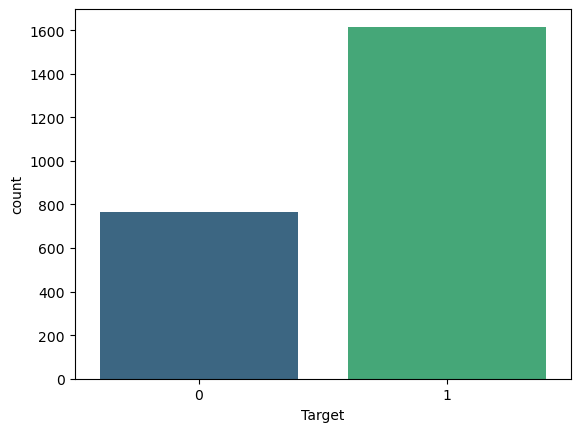

In [49]:
sns.countplot(x='Target', data=df2, palette='viridis')

plt.show()

In [50]:
# List of columns for which you want to count observations
columns_to_count = ['Gender', 'City', 'Education', 'Joining_Designation', 'Grade', 
                    'Last_Quarterly_Rating', 'Quarterly_Rating_Increased', 'Income_Increased']

# Loop through each column and print value counts
for column in columns_to_count:
    print(f"Count of observations in '{column}':")
    print(df2[column].value_counts())
    print("-" * 60)


Count of observations in 'Gender':
0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: Gender, dtype: int64
------------------------------------------------------------
Count of observations in 'City':
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64
------------------------------------------------------------
Count of observations in 'Education':
2.0    802
1.0    795
0.0    784
Name: Education, dtype: int64
------------------------------------------------------------
Count of observations in 'Joining_Designation':
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: Joining_Designation, dtype: int64
------------------------------------------------------------
Count of

* Out of 2381 drivers, 1400 employees are of the Male gender and 975 are females.
* Out of 2381 drivers, 152 employees are from city C20 and 101 from city C15.
* Out of 2381 drivers, 802 employees have their education as Graduate and 795 have completed their 12.
* Out of 2381 drivers, 1026 joined with the joining designation as 1, 815 employees joined with the joining designation 2.
* Out of 2381 drivers, 855 employees had their grade as 2 at the time of reporting.
* Out of 2381 drivers, 1744 employees had their last quarterly rating as 1.
* Out of 2381 drivers, the quarterly rating has not increased for 2023 employees.

In [51]:
# List of columns for which you want to print proportions
columns_to_print_proportions = ['Gender', 'City', 'Education', 'Joining_Designation', 
                                'Grade', 'Last_Quarterly_Rating', 'Quarterly_Rating_Increased', 
                                'Income_Increased']

# Loop through each column and print proportions
for column in columns_to_print_proportions:
    print(f"Proportion of observations in '{column}':")
    print(df2[column].value_counts(normalize=True))
    print("-" * 60)


Proportion of observations in 'Gender':
0.0    0.587988
1.0    0.409492
0.6    0.001260
0.2    0.000840
0.4    0.000420
Name: Gender, dtype: float64
------------------------------------------------------------
Proportion of observations in 'City':
C20    0.063839
C15    0.042419
C29    0.040319
C26    0.039059
C8     0.037379
C27    0.037379
C10    0.036119
C16    0.035279
C22    0.034439
C3     0.034439
C28    0.034439
C12    0.034019
C5     0.033599
C1     0.033599
C21    0.033179
C14    0.033179
C6     0.032759
C4     0.032339
C7     0.031919
C9     0.031499
C25    0.031079
C23    0.031079
C24    0.030659
C19    0.030239
C2     0.030239
C17    0.029819
C13    0.029819
C18    0.028979
C11    0.026879
Name: City, dtype: float64
------------------------------------------------------------
Proportion of observations in 'Education':
2.0    0.336833
1.0    0.333893
0.0    0.329273
Name: Education, dtype: float64
------------------------------------------------------------
Proportion of ob

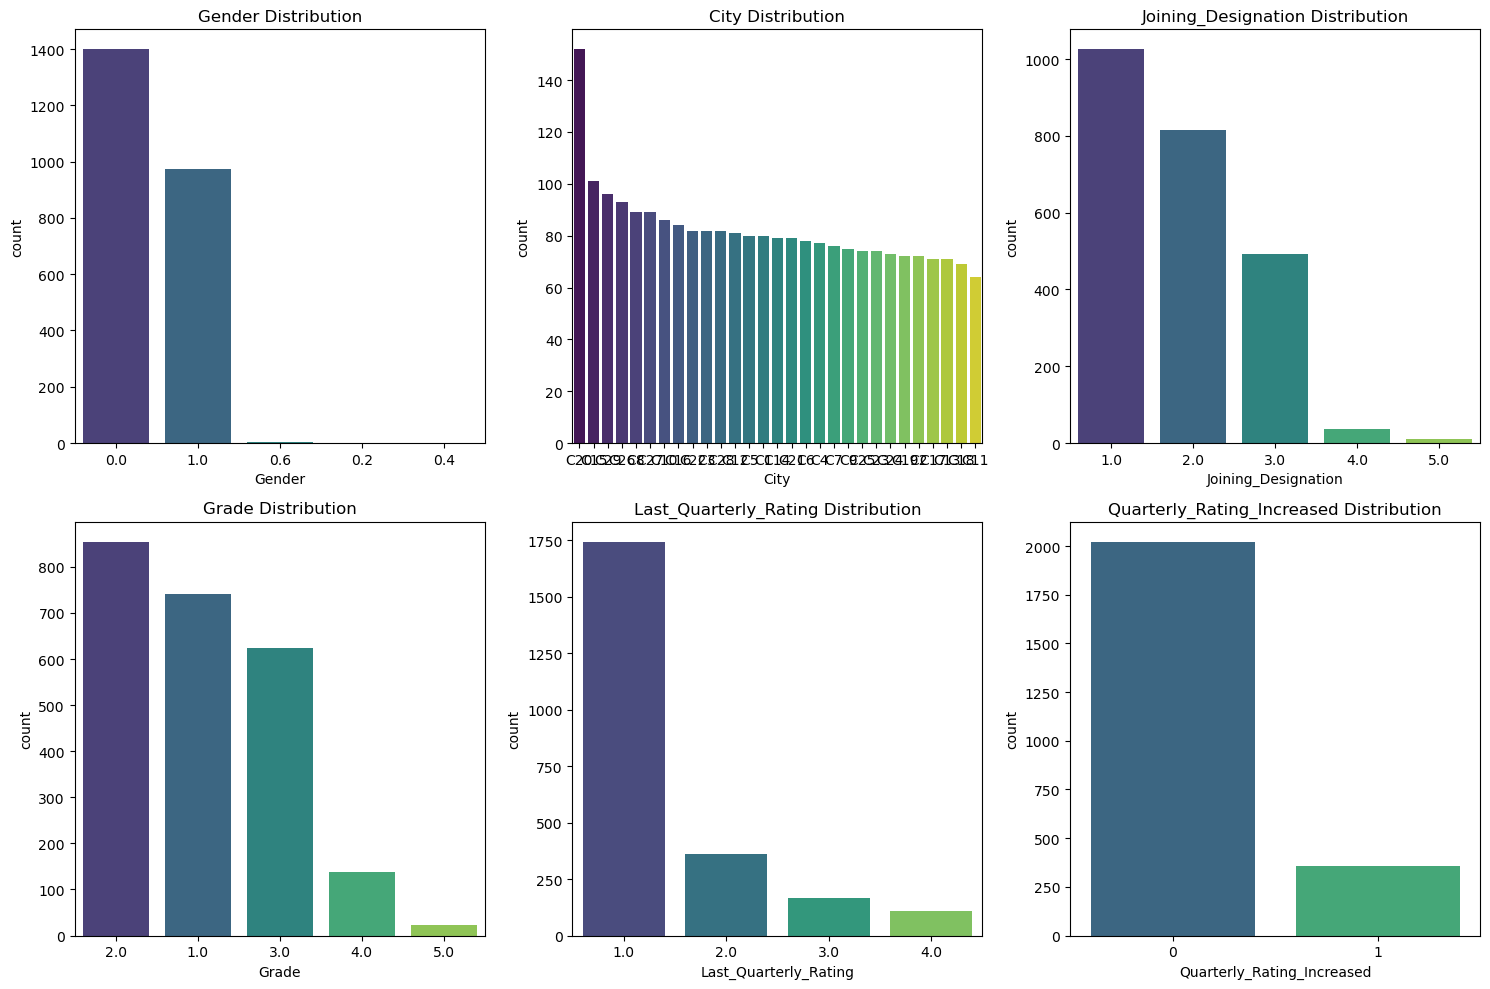

In [54]:


# List of columns for which you want to create subplots
columns_to_plot = ['Gender', 'City', 'Joining_Designation', 'Grade', 
                   'Last_Quarterly_Rating', 'Quarterly_Rating_Increased']

# Set a larger figure size
plt.figure(figsize=(15, 10))

# Create subplots
for index, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, index)
    
    # Sort values in descending order before plotting
    sorted_values = df2[column].value_counts().sort_values(ascending=False)
    
    sns.countplot(x=column, data=df2, order=sorted_values.index, palette='viridis')
    plt.title(f'{column} Distribution')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


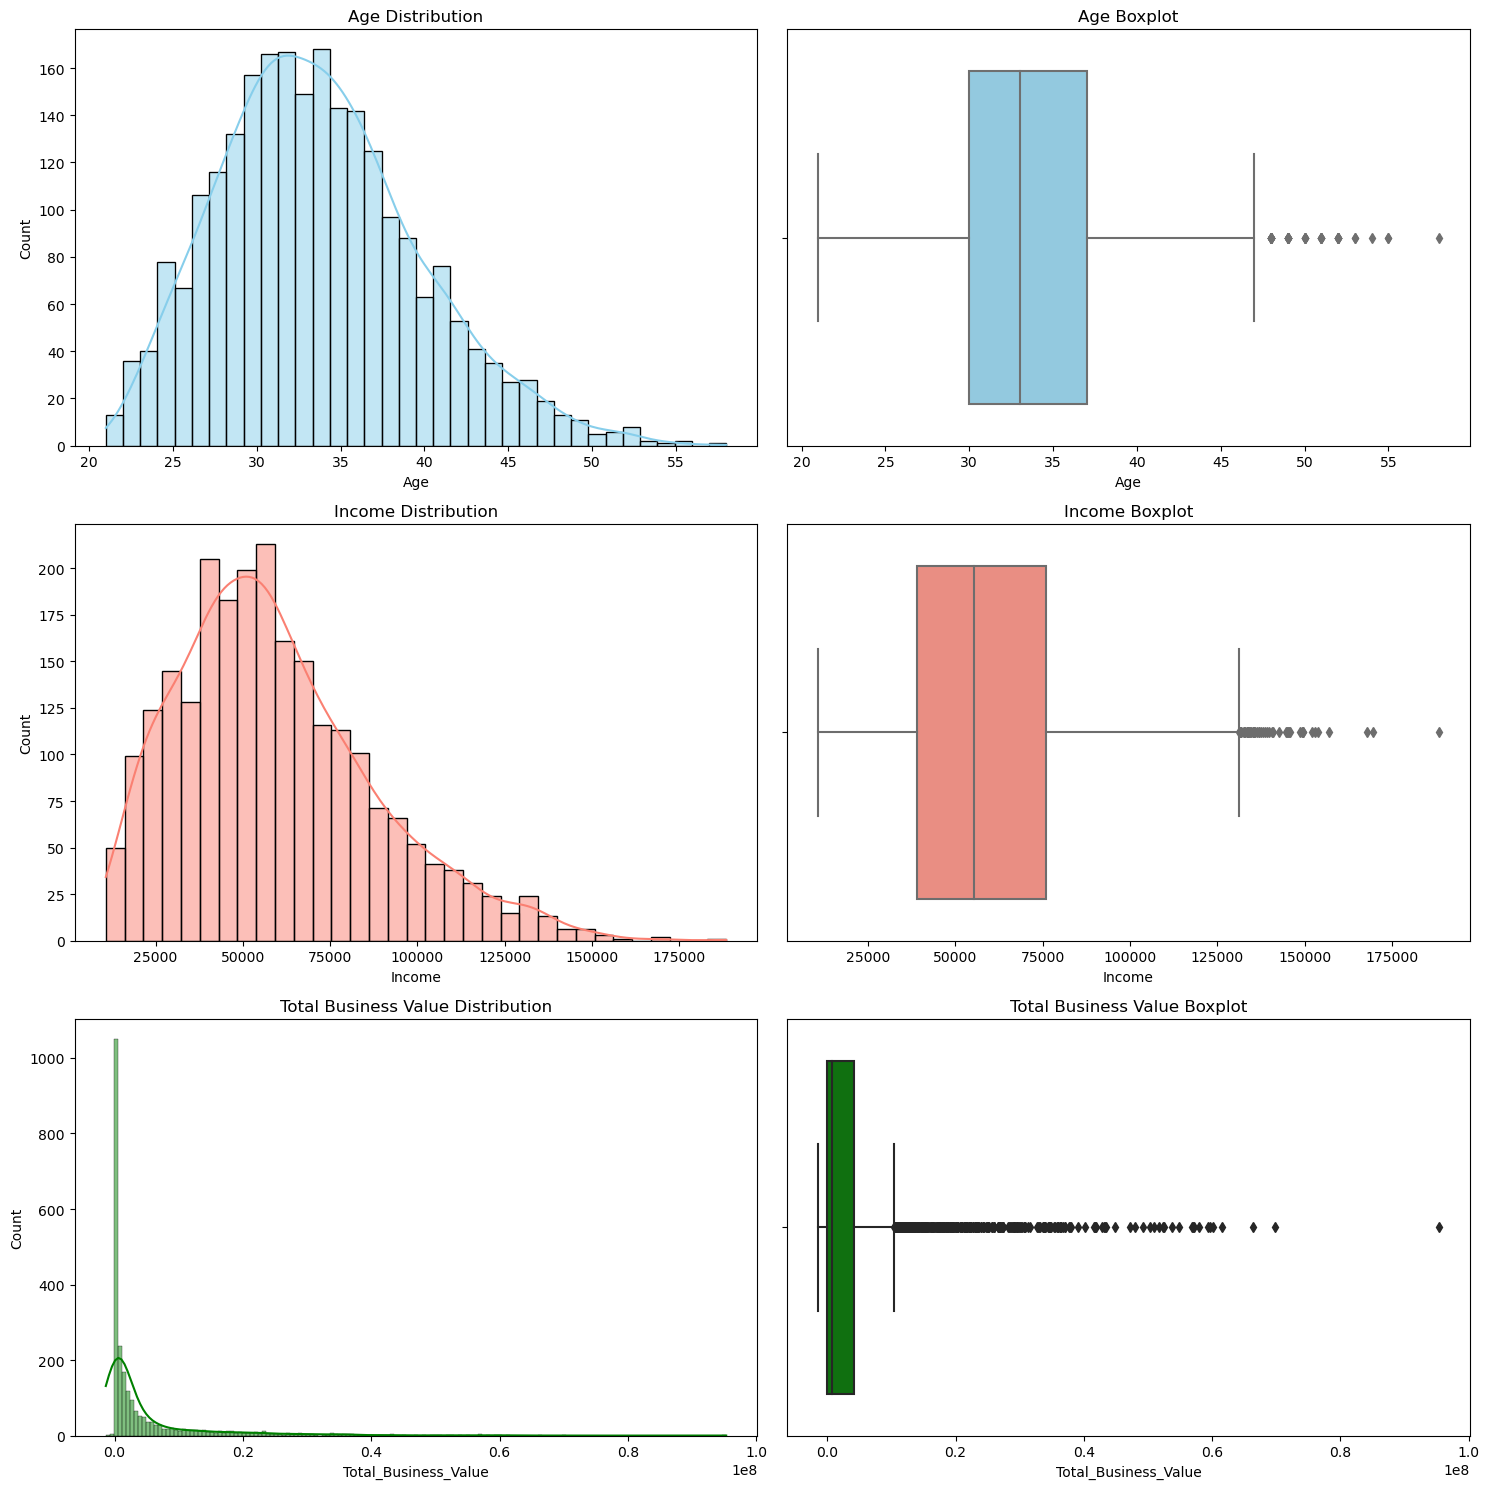

In [57]:

# Set a larger figure size
plt.figure(figsize=(15, 15))

# Create subplots
plt.subplot(3, 2, 1)
sns.histplot(df2['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(3, 2, 2)
sns.boxplot(x=df2['Age'], color='skyblue')
plt.title('Age Boxplot')

plt.subplot(3, 2, 3)
sns.histplot(df2['Income'], kde=True, color='salmon')
plt.title('Income Distribution')

plt.subplot(3, 2, 4)
sns.boxplot(x=df2['Income'], color='salmon')
plt.title('Income Boxplot')

plt.subplot(3, 2, 5)
sns.histplot(df2['Total_Business_Value'], kde=True, color='green')
plt.title('Total Business Value Distribution')

plt.subplot(3, 2, 6)
sns.boxplot(x=df2['Total_Business_Value'], color='green')
plt.title('Total Business Value Boxplot')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



* There are few outliers in the Age. The distribution is towards the right.
* The distribution of Income is towards the right and there are outliers for this feature as well
* The distribution of total business value is towards the right. There are a lot of outliers for the feature Total Business    Value.

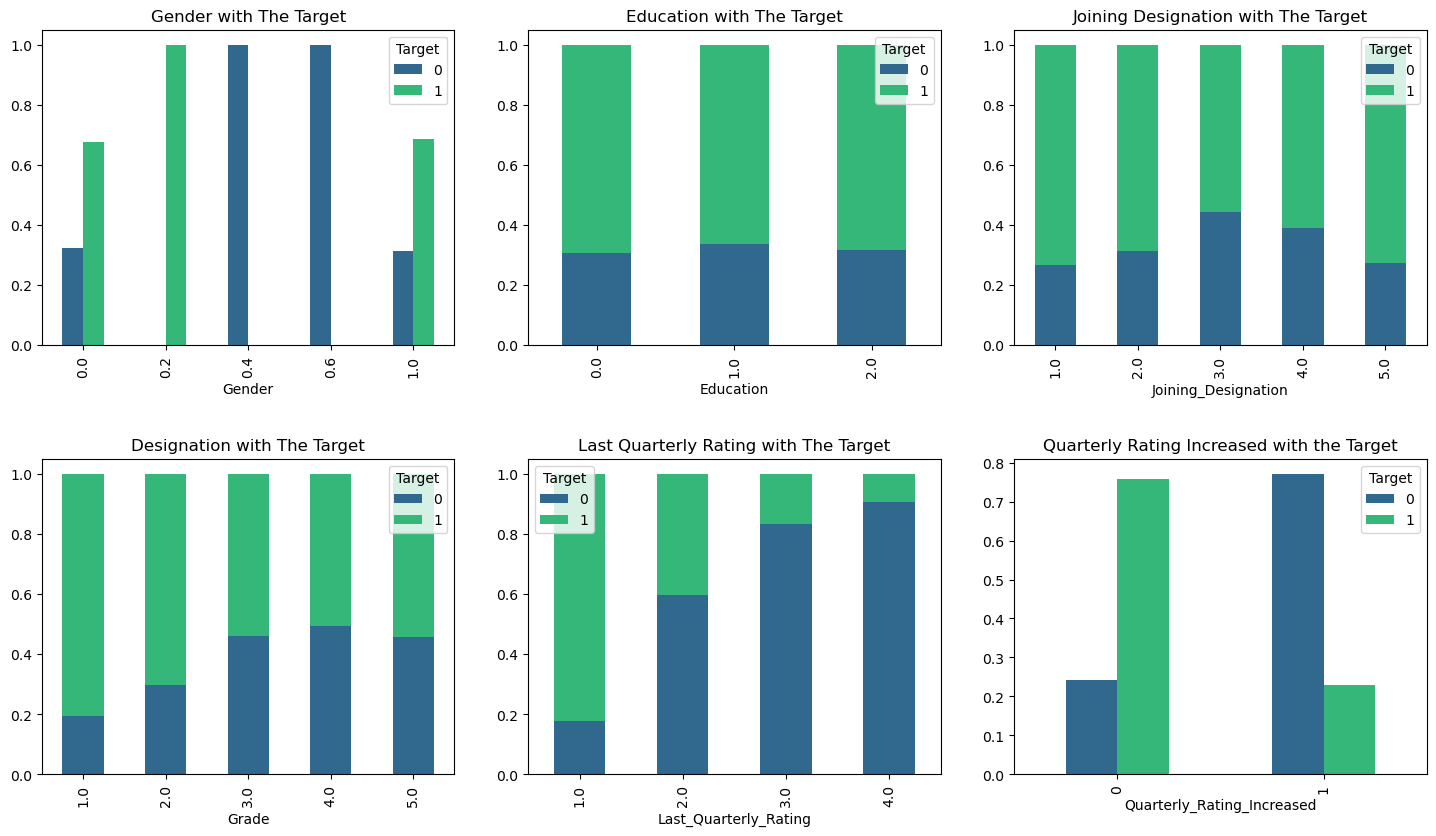

In [58]:

# Set a larger figure size
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

# Colors for better visualization
colors = sns.color_palette("viridis", 2)

# Gender feature with Target
gender = pd.crosstab(df2['Gender'], df2['Target'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[0, 0], color=colors, title="Gender with The Target")

# Education feature with Target
education = pd.crosstab(df2['Education'], df2['Target'])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0, 1], color=colors, title="Education with The Target")

# Joining Designation feature with Target
jde = pd.crosstab(df2['Joining_Designation'], df2['Target'])
jde.div(jde.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0, 2], color=colors, title="Joining Designation with The Target")

# Designation feature with Target
desig = pd.crosstab(df2['Grade'], df2['Target'])
desig.div(desig.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1, 0], color=colors, title="Designation with The Target")

# Last Quarterly Rating feature with Target
lqrate = pd.crosstab(df2['Last_Quarterly_Rating'], df2['Target'])
lqrate.div(lqrate.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1, 1], color=colors, title="Last Quarterly Rating with The Target")

# Quarterly Rating Increased feature with Target
qratei = pd.crosstab(df2['Quarterly_Rating_Increased'], df2['Target'])
qratei.div(qratei.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[1, 2], color=colors, title="Quarterly Rating Increased with the Target")

# Adjust layout for better spacing
plt.tight_layout(pad=3)

# Show the plots
plt.show()


* The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.
* The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
* The employees who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.
* The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.
* The employees whose quarterly rating has increased are less likely to leave the organization.

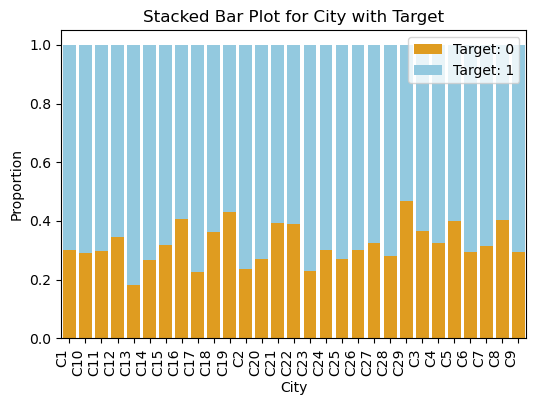

In [75]:


# Calculate the proportions for the stacked bar plot
city_proportions = df2.groupby(['City', 'Target']).size().unstack().div(df2.groupby('City').size(), axis=0)

# Set a smaller figure size and change colors
plt.figure(figsize=(6, 4))

# Plot the stacked bar plot with 'Target: 1' above 'Target: 0'
sns.barplot(x=city_proportions.index, y=city_proportions[0], color='orange', label='Target: 0')
sns.barplot(x=city_proportions.index, y=city_proportions[1], bottom=city_proportions[0], color='skyblue', label='Target: 1')
plt.xticks(rotation=90, ha='right')
# Set labels and title
plt.xlabel('City')
plt.ylabel('Proportion')
plt.title('Stacked Bar Plot for City with Target')
plt.legend(loc='upper right')

# Show the plot
plt.show()


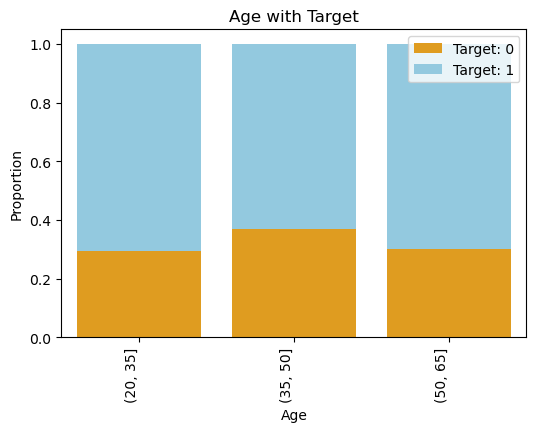

In [77]:

# Binning the Age into categories
df2['Age_Bin'] = pd.cut(df2['Age'], bins=[20, 35, 50, 65])

# Calculate the proportions for the stacked bar plot
age_proportions = pd.crosstab(df2['Age_Bin'], df2['Target']).div(pd.crosstab(df2['Age_Bin'], df2['Target']).sum(1).astype(float), axis=0)

# Set a smaller figure size and change colors
plt.figure(figsize=(6, 4))

# Plot the stacked bar plot for 'Age' with 'Target: 1' above 'Target: 0'
sns.barplot(x=age_proportions.index, y=age_proportions[0], color='orange', label='Target: 0')
sns.barplot(x=age_proportions.index, y=age_proportions[1], bottom=age_proportions[0], color='skyblue', label='Target: 1')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90, ha='right')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Age with Target')

# Move legend to top-right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()


#### The employees whose age is in the 20-35 or 50-65 groups are less likely to leave the organization.

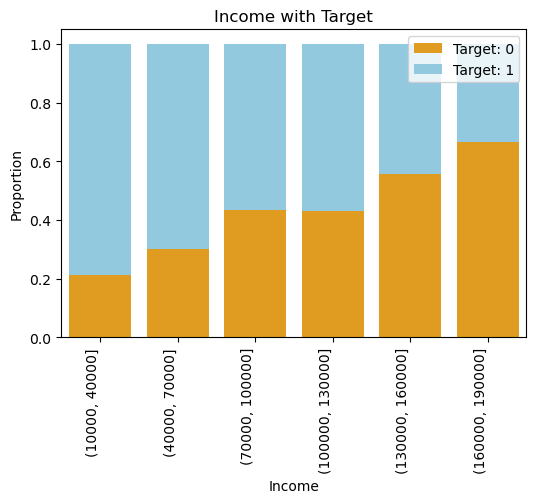

In [79]:

# Binning the Income into categories
df2['Income_Bin'] = pd.cut(df2['Income'], bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000])

# Calculate the proportions for the stacked bar plot
income_proportions = pd.crosstab(df2['Income_Bin'], df2['Target']).div(pd.crosstab(df2['Income_Bin'], df2['Target']).sum(1).astype(float), axis=0)

# Set a smaller figure size and change colors
plt.figure(figsize=(6, 4))

# Plot the stacked bar plot for 'Income' with 'Target: 1' above 'Target: 0'
sns.barplot(x=income_proportions.index, y=income_proportions[0], color='orange', label='Target: 0')
sns.barplot(x=income_proportions.index, y=income_proportions[1], bottom=income_proportions[0], color='skyblue', label='Target: 1')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90, ha='right')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Proportion')
plt.title('Income with Target')

# Move legend to top-right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()


#### The employees whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the organization.

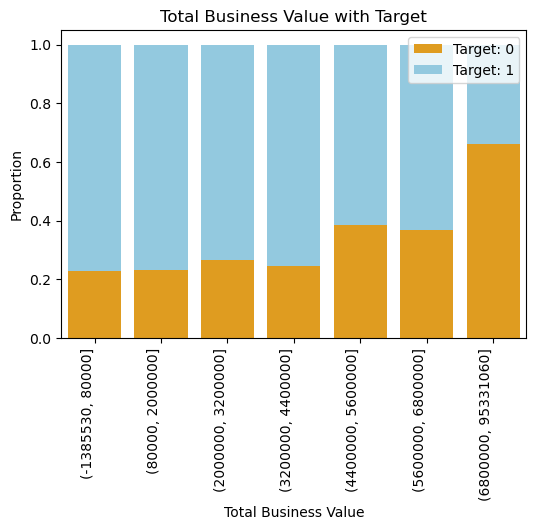

In [80]:

# Defining the bins and groups
m1 = round(df2['Total_Business_Value'].min())
m2 = round(df2['Total_Business_Value'].max())
bins = [m1, 80000, 2000000, 3200000, 4400000, 5600000, 6800000, m2]

# Binning the Total Business Value into categories
df2['TBV_Bin'] = pd.cut(df2['Total_Business_Value'], bins)

# Calculate the proportions for the stacked bar plot
tbv_proportions = pd.crosstab(df2['TBV_Bin'], df2['Target']).div(pd.crosstab(df2['TBV_Bin'], df2['Target']).sum(1).astype(float), axis=0)

# Set a smaller figure size and change colors
plt.figure(figsize=(6, 4))

# Plot the stacked bar plot for 'Total Business Value' with 'Target: 1' above 'Target: 0'
sns.barplot(x=tbv_proportions.index, y=tbv_proportions[0], color='orange', label='Target: 0')
sns.barplot(x=tbv_proportions.index, y=tbv_proportions[1], bottom=tbv_proportions[0], color='skyblue', label='Target: 1')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90, ha='right')

# Set labels and title
plt.xlabel('Total Business Value')
plt.ylabel('Proportion')
plt.title('Total Business Value with Target')

# Move legend to top-right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()


#### **The employees who have acquired total business value greater than 68,00,000 are less likely to leave the organiztion.**

In [81]:
df2

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased,Age_Bin,Income_Bin,TBV_Bin
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0,"(20, 35]","(40000, 70000]","(80000, 2000000]"
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0,"(20, 35]","(40000, 70000]","(-1385530, 80000]"
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0,"(35, 50]","(40000, 70000]","(80000, 2000000]"
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0,"(20, 35]","(40000, 70000]","(80000, 2000000]"
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0,"(20, 35]","(70000, 100000]","(80000, 2000000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0,0,"(20, 35]","(70000, 100000]","(6800000, 95331060]"
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,1,0,"(20, 35]","(10000, 40000]","(-1385530, 80000]"
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1,0,"(35, 50]","(10000, 40000]","(2000000, 3200000]"
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1,0,"(20, 35]","(40000, 70000]","(80000, 2000000]"


In [83]:
#Dropping the bins columns
df2.drop(['Age_Bin','Income_Bin','TBV_Bin'],axis=1,inplace=True)

In [84]:
df2

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,1,0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1,0


#### Drawing pairplots and correlation heatmaps

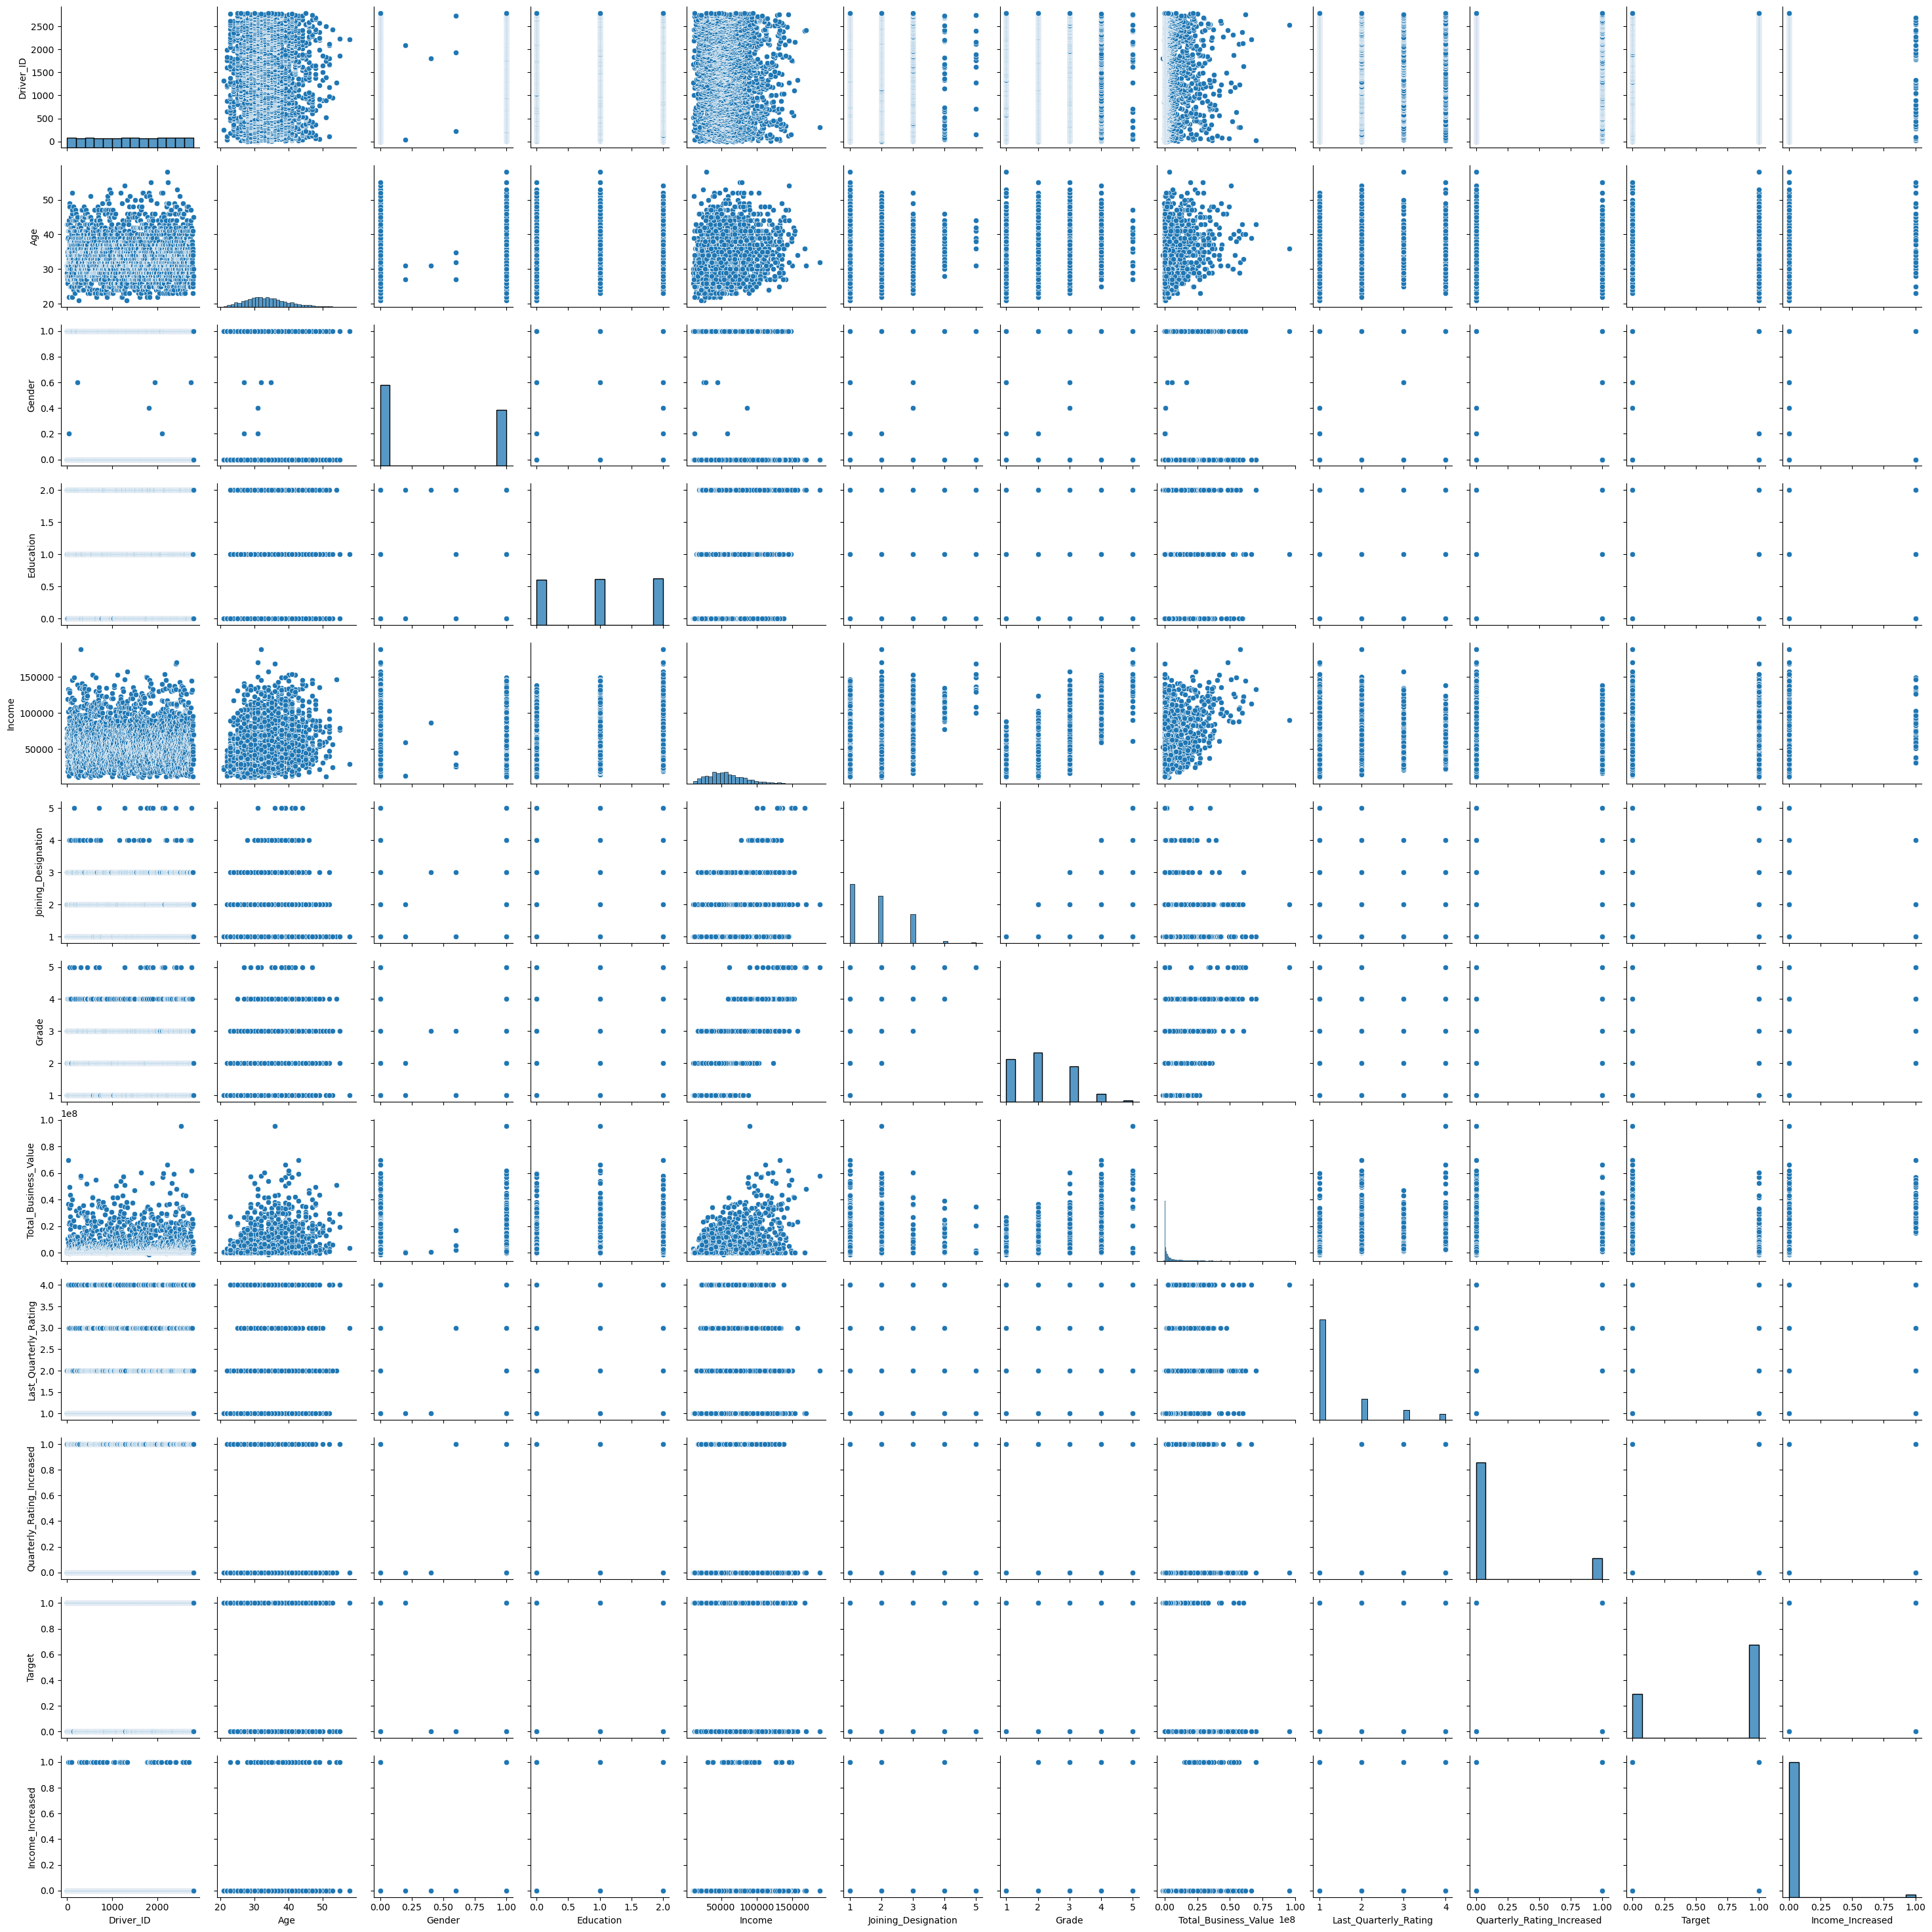

In [86]:

# Create a pairplot for df2
sns.pairplot(df2)

# Show the plot
plt.show()


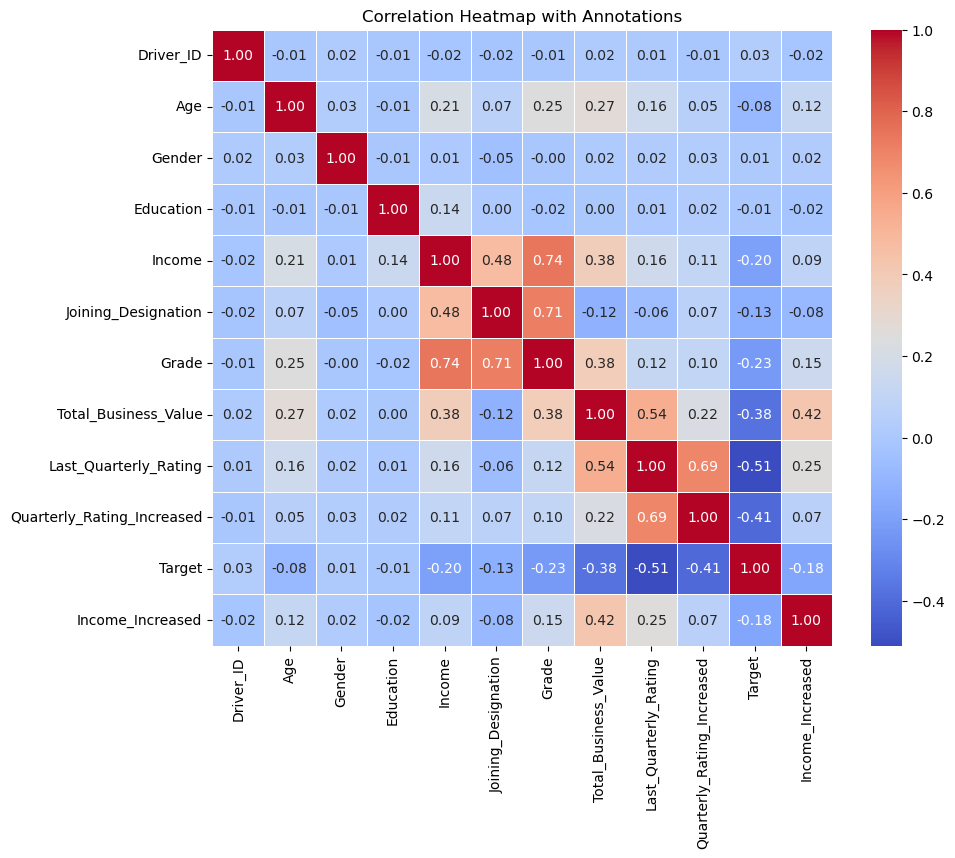

In [121]:
correlation_matrix = df2.corr()

# Create a heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set title and show the plot
plt.title('Correlation Heatmap with Annotations')
plt.show()

### One Hot Encoding for categorical column city

In [91]:

df3 = pd.concat([df2,pd.get_dummies(df2['City'])],axis=1)

In [92]:
df3

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,...,C27,C28,C29,C3,C4,C5,C6,C7,C8,C9
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,...,0,0,0,0,0,0,0,0,0,0


### Standardization

In [95]:
#Feature Variables
X = df3.drop(['Driver_ID','Target','City'],axis=1)
X_cols=X.columns
# StandardScaler
scaler = StandardScaler()

#Mathematically learning the distribution
X=scaler.fit_transform(X)


In [96]:
X=pd.DataFrame(X)

In [97]:
X.columns=X_cols

In [98]:
X

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,C27,C28,C29,C3,C4,C5,C6,C7,C8,C9
0,-0.972718,-0.835551,1.216049,-0.068616,-0.975022,-1.164953,-0.314641,0.706497,-0.420672,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,-0.180344
1,-0.466988,-0.835551,1.216049,0.270700,0.213676,-0.102619,-0.502646,-0.528576,-0.420672,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,5.507172,-0.197055,-0.180344
2,1.555932,-0.835551,1.216049,0.220907,0.213676,-0.102619,-0.464290,-0.528576,-0.420672,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,-0.180344
3,-0.804141,-0.835551,-1.234575,-0.456914,-0.975022,-1.164953,-0.489456,-0.528576,-0.420672,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,5.544968
4,-0.466988,1.199480,-0.009263,0.683418,1.402374,0.959714,-0.364019,0.706497,2.377149,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,-0.180344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.038742,-0.835551,-1.234575,0.827440,0.213676,0.959714,1.880735,3.176643,2.377149,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,-0.180344
2377,0.038742,1.199480,-1.234575,-1.664305,-0.975022,-1.164953,-0.502646,-0.528576,-0.420672,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,5.544968
2378,1.893086,-0.835551,-1.234575,-0.844471,0.213676,-0.102619,-0.194149,-0.528576,-0.420672,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,-0.180344
2379,-0.972718,1.199480,1.216049,0.358163,-0.975022,-1.164953,-0.395489,-0.528576,-0.420672,-0.135616,...,-0.197055,-0.188859,-0.204971,-0.188859,-0.182812,-0.18646,-0.184035,-0.181581,-0.197055,-0.180344


#### Target y and Train Test Split

In [99]:
#Target Variable
y = df2['Target']
# split into 80:20 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [100]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1904, 39), (477, 39), (1904,), (477,))

#### Handling Data Imbalance with Class weights

In [101]:
from sklearn.utils import class_weight

## Random Forest Classifier with class weights

In [102]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are : {'max_depth': 4, 'n_estimators': 50}
The score is : 0.85994308852257
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       150
           1       0.83      0.88      0.85       327

    accuracy                           0.79       477
   macro avg       0.76      0.74      0.75       477
weighted avg       0.79      0.79      0.79       477

[[ 90  60]
 [ 39 288]]


## Random Forest Classifier with bootstrapped class weights

In [103]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight ='balanced_subsample')

c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are : {'max_depth': 4, 'n_estimators': 150}
The score is : 0.8602703770020591
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       150
           1       0.83      0.90      0.86       327

    accuracy                           0.80       477
   macro avg       0.78      0.74      0.76       477
weighted avg       0.79      0.80      0.79       477

[[ 88  62]
 [ 33 294]]


## Random Forest Classifier

In [104]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 4, 'n_estimators': 200}
The score is : 0.8575971430568892


In [105]:
pred = c.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.59      0.65       150
           1       0.83      0.89      0.86       327

    accuracy                           0.80       477
   macro avg       0.77      0.74      0.75       477
weighted avg       0.79      0.80      0.79       477

[[ 89  61]
 [ 36 291]]


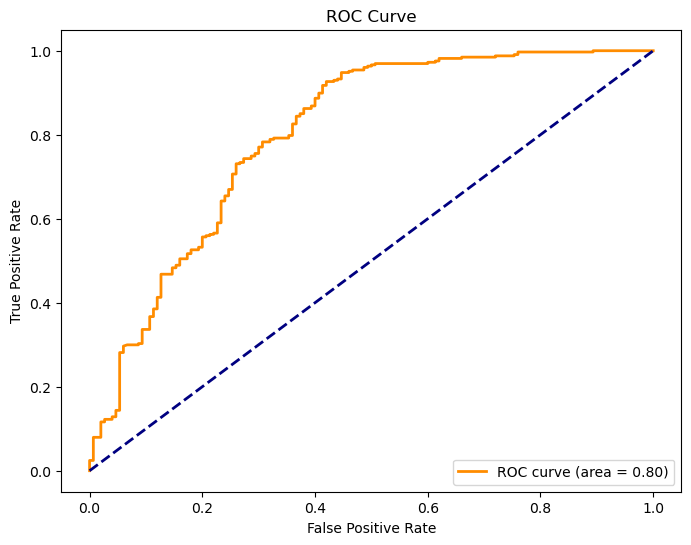

In [106]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


# Get predicted probabilities for the positive class using the best model
y_probs = c.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


## GBDT

In [138]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}

gbdt = GradientBoostingClassifier()

c = GridSearchCV(gbdt,param,cv=3,scoring='f1')
c.fit(X_train,y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 2, 'n_estimators': 50}
The score is : 0.8676446326604861


## XGBoost Classifier

In [109]:
import xgboost as xgb
my_model = xgb.XGBClassifier(class_weight ='balanced')
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.72      0.51      0.60       150
           1       0.80      0.91      0.85       327

    accuracy                           0.78       477
   macro avg       0.76      0.71      0.72       477
weighted avg       0.78      0.78      0.77       477

[[ 76  74]
 [ 29 298]]


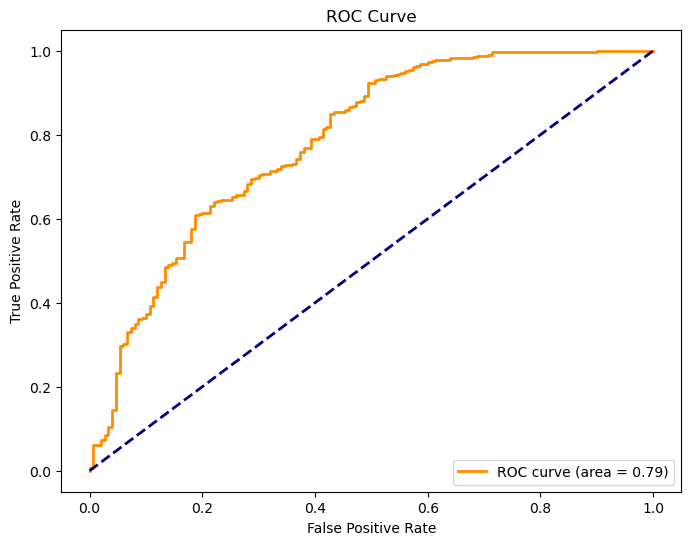

In [110]:
y_probs = my_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

## Decision Tree Classifier

In [111]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       150
           1       0.78      0.77      0.78       327

    accuracy                           0.70       477
   macro avg       0.65      0.65      0.65       477
weighted avg       0.70      0.70      0.70       477

[[ 81  69]
 [ 76 251]]


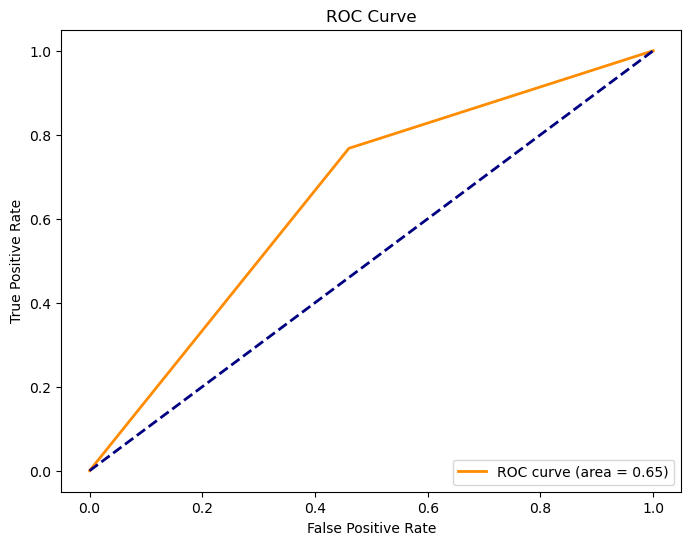

In [112]:
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

## Feature Importance for best models

In [116]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight ='balanced')

random_forest.fit(X_train,y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 4, 'n_estimators': 200}
The score is : 0.8575971430568892


In [117]:
import time
import numpy as np

start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


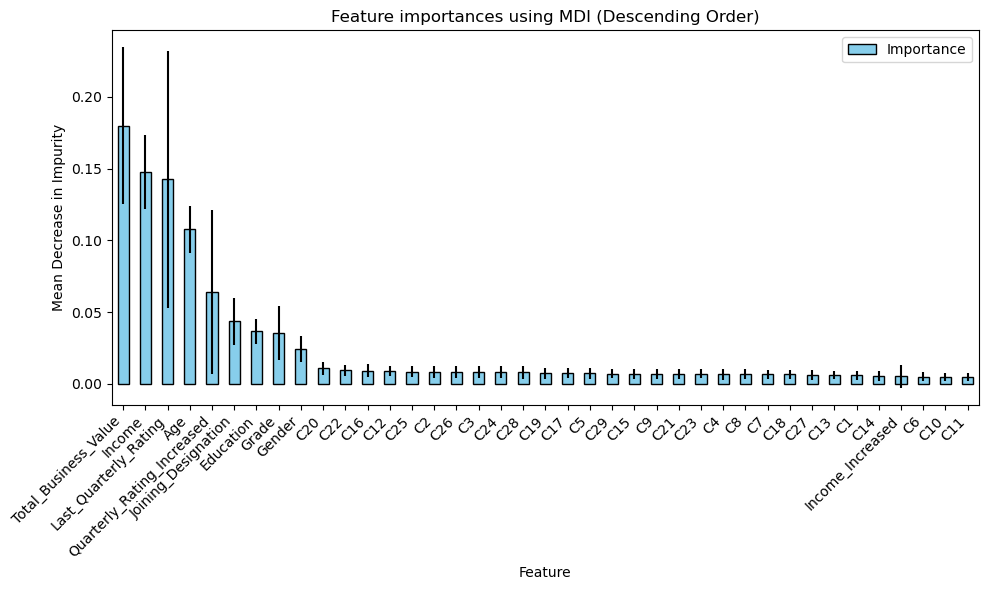

In [120]:
# Create a DataFrame for better handling
forest_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances, 'Std': std})

# Sort the DataFrame by importance values in descending order
forest_importances = forest_importances.sort_values(by='Importance', ascending=False)

# Plotting with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(x='Feature', y='Importance', yerr='Std', ax=ax, color='skyblue', edgecolor='black')

# Set labels and title
ax.set_title("Feature importances using MDI (Descending Order)")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Feature")
ax.set_xticklabels(forest_importances['Feature'], rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

## Insights and Recommendations

#### Insights
* Out of 2381 drivers 1616 have left the company.
* Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
* Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is red flag for the company which needs to regulate.
* The Random Forest Classifier attains the Recall score of 90% for the driver who left the company which indicates that model is performing the decent job.
* The employees who have acquired total business value greater than 68,00,000 are less likely to leave the organiztion
* The employees whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the organization
* The employees whose age is in the 20-35 or 50-65 groups are less likely to leave the organization.
* The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.
* The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
* The employees who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.
* The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.
* The employees whose quarterly rating has increased are less likely to leave the organization.
#### Recommendations
* We need to incentivise the drivers overtime or other perks to overcome churning
* The employees whose quarterly rating has increased are less likely to leave the organization.
* Company needs to implement the reward system for the customer who provide the feedback and rate drivers
* The employees whose monthly salary has not increased are more likely to leave the organization.
* Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.
* Company needs to look why customers are not rating drivers.
* Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features. Company needs to tracks these features as predicators
* We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset. More data will overcome this issue.


## Answers to questionnaire

In [124]:
# 1. What percentage of drivers have received a quarterly rating of 5?
percentage_rating_5 = (df[df['Quarterly Rating'] == 5].shape[0] / df2.shape[0]) * 100
print(f"Percentage of drivers with Quarterly Rating of 5: {percentage_rating_5:.2f}%")

Percentage of drivers with Quarterly Rating of 5: 0.00%


In [125]:
df['Quarterly Rating'].unique()

array([2, 1, 4, 3], dtype=int64)

In [127]:
# 2. Comment on the correlation between Age and Quarterly Rating.
correlation_age_rating = df['Age'].corr(df['Quarterly Rating'])
print(f"Correlation between Age and Quarterly Rating: {correlation_age_rating:.2f}")

Correlation between Age and Quarterly Rating: 0.17


In [176]:
# 3. Name the city which showed the most improvement in Quarterly Rating over the past year

In [157]:
df5=pd.DataFrame(df.groupby(['City','Year'])['Quarterly Rating'].mean())


In [165]:
df5

Quarterly Rating
City Year                  
C1   2019          1.944020
     2020          2.003521
C10  2019          1.957265
     2020          1.877863
C11  2019          1.988848
     2020          1.944724
C12  2019          2.002841
     2020          2.008000
C13  2019          2.003226
     2020          2.069498
C14  2019          2.155367
     2020          1.996599
C15  2019          1.910811
     2020          2.061381
C16  2019          2.092715
     2020          2.100737
C17  2019          1.891697
     2020          1.552147
C18  2019          2.140351
     2020          2.015444
C19  2019          2.045455
     2020          2.058020
C2   2019          1.941176
     2020          1.695000
C20  2019          1.844569
     2020          1.858650
C21  2019          2.182510
     2020          2.032353
C22  2019          2.180488
     2020          2.075188
C23  2019          1.958621
     2020          1.798387
C24  2019          2.076696
     2020          2.236364
C25  2019          1.917614
     2020          1.784483
C26  2019          2.115385
     2020          2.142857
C27  2019          2.141388
     2020          2.055416
C28  2019          2.106109
     2020          1.927419
C29  2019          2.065963
     2020          2.261036
C3   2019          2.088235
     2020          1.927492
C4   2019          1.983713
     2020          1.833948
C5   2019          1.986842
     2020          2.096591
C6   2019          2.048295
     2020          2.055195
C7   2019          1.877358
     2020          1.917526
C8   2019          2.014970
     2020          2.097884
C9   2019          1.945525
     2020          1.756654

In [179]:
# City C29

In [134]:
# 4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)
average_business_value_grade_A = df[df['Grade'] == 1]['Total Business Value'].mean()
average_business_value_all = df['Total Business Value'].mean()
result = average_business_value_grade_A > average_business_value_all
print(f"Drivers with Grade 'A' are more likely to have higher Total Business Value: {result}")

Drivers with Grade 'A' are more likely to have higher Total Business Value: False


In [174]:
# 5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
Business Value in the subsequent period?

import pandas as pd

# Assuming you have a DataFrame 'df' with relevant columns, including 'Driver_ID', 'Quarterly Rating', and 'Total Business Value'

# Sort the DataFrame by 'Driver_ID' and 'MMMM-YY' (assuming it represents the time period)
df6.sort_values(['Driver_ID', 'MMM-YY'], inplace=True)

# Calculate the change in Quarterly Rating for each driver
df6['Rating_Drop'] = df6.groupby('Driver_ID')['Quarterly Rating'].diff()

# Assuming a significant drop is defined as a drop greater than a certain threshold (you can adjust this threshold)
significant_drop_threshold = 2  # Adjust as needed
significant_drop_df = df6[df6['Rating_Drop'] < -significant_drop_threshold]

# Group by Driver_ID and calculate the mean Total Business Value in the subsequent period
subsequent_business_value = significant_drop_df.groupby('Driver_ID')['Total Business Value'].mean()

# Print or analyze the results
print("Average Total Business Value in the subsequent period after a significant drop in Quarterly Rating:")
print(subsequent_business_value)


Average Total Business Value in the subsequent period after a significant drop in Quarterly Rating:
Driver_ID
12            0.0
57            0.0
98       291280.0
169      151580.0
172           0.0
217           0.0
227      650000.0
307      500050.0
373           0.0
436     1149410.0
481           0.0
494           0.0
835           0.0
897           0.0
924      150080.0
935           0.0
1010     571540.0
1049     100050.0
1050     106980.0
1111          0.0
1229     200000.0
1354    2166270.0
1374    -831520.0
1479          0.0
1509          0.0
1569     180000.0
1600          0.0
1612     240000.0
1621          0.0
1675          0.0
1770          0.0
1810     100440.0
1858          0.0
1977     302110.0
2049          0.0
2070          0.0
2211          0.0
2379          0.0
2455          0.0
2470          0.0
2488          0.0
2489          0.0
2493     295910.0
2496     409750.0
2541     111030.0
2546     300000.0
2632          0.0
2642     145180.0
2661          0.0
2725    

#### # 6. From Ola's perspective, which metric should be the primary focus for driver
retention?
* ROC AUC
* Precision
* Recall
* F1 Score

Ans-
the choice of the most important metric depends on the specific business context. Considerations should include:

**Costs and Consequences**: What are the costs associated with false positives and false negatives? Does the company want to prioritize minimizing one type of error over the other?

**Business Objectives**: What are the main goals of predicting driver attrition? Is the focus on retaining as many drivers as possible, or is it more critical to accurately identify drivers at risk of leaving?

**Operational Impact**: How will the predictions be used operationally? For example, will the company use the predictions to implement targeted retention strategies?

For example here the data was imbalanced,hence F1 score could be given importance

#### #7. How does the gap in precision and recall affect Ola's relationship with its
drivers and customers?

High Recall, Low Precision:

* Impact on Drivers: Emphasizing high recall (capturing most of the drivers who actually leave) may result in more accurate identification of drivers at risk. However, it could also lead to false alarms, where some drivers are incorrectly flagged for attrition. This might cause frustration and confusion among drivers who receive such notifications without intending to leave.


* Impact on Customers: There might be a risk of frequent changes in driver availability, potentially impacting the reliability and consistency of Ola's service. Customers may experience fluctuations in driver availability without clear reasons.

#### #8. Besides the obvious features like "Number of Rides", which lesser-discussed
features might have a strong impact on a driver's Quarterly Rating?

Ans-1.Customer Ratings
    2.Cancellation Rate
    3.Punctuality

In [178]:
#9. Will the driver's performance be affected by the City they operate in? (Yes/No)

In [146]:
df.groupby('City')['Quarterly Rating'].mean().round(0)

City
C1     2.0
C10    2.0
C11    2.0
C12    2.0
C13    2.0
C14    2.0
C15    2.0
C16    2.0
C17    2.0
C18    2.0
C19    2.0
C2     2.0
C20    2.0
C21    2.0
C22    2.0
C23    2.0
C24    2.0
C25    2.0
C26    2.0
C27    2.0
C28    2.0
C29    2.0
C3     2.0
C4     2.0
C5     2.0
C6     2.0
C7     2.0
C8     2.0
C9     2.0
Name: Quarterly Rating, dtype: float64

##### Driver's performance NOT affected by city

In [170]:
df6=df

In [171]:
df6

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Year,Rating_Drop
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019,NaN
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019,0.0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2019,0.0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020,-1.0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,2020,0.0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,2020,0.0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,2020,-1.0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2020,0.0


In [181]:
# 10.Analyze any seasonality in the driver's ratings. Do certain times of the year
#correspond to higher or lower ratings, and why might that be?

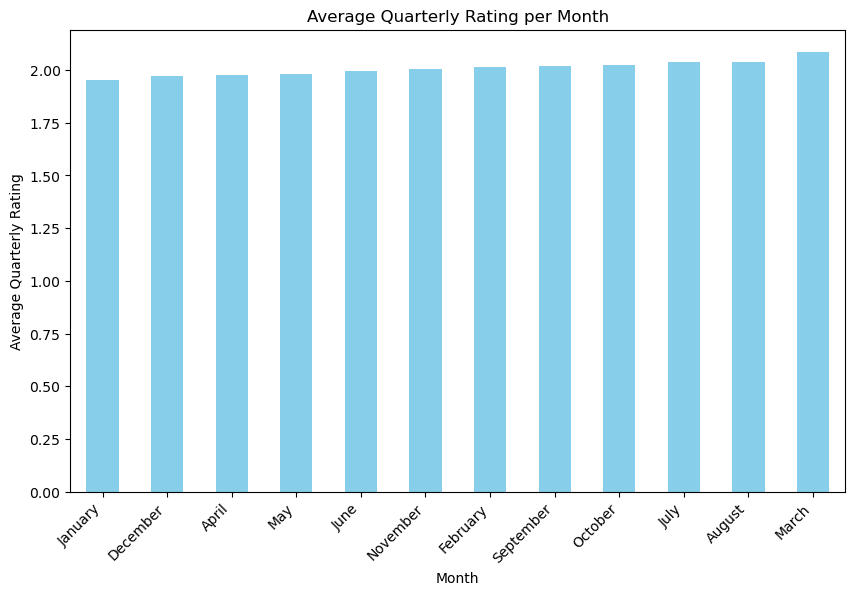

In [175]:
# Convert 'MMMM-YY' to datetime format
df6['Date'] = pd.to_datetime(df6['MMM-YY'])

# Create a new column for the month
df6['Month'] = df6['Date'].dt.month_name()

# Calculate the average rating per month
average_rating_per_month = df6.groupby('Month')['Quarterly Rating'].mean().sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
average_rating_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Quarterly Rating per Month')
plt.xlabel('Month')
plt.ylabel('Average Quarterly Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

#### March slight increase